In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy.interpolate as interp
import scipy.optimize as opt

In [4]:
plt.style.use('aps')
mpl.rcParams["figure.figsize"] = [3.4039, 2.10373]

In [5]:
V = np.load('verified_HeBz_CC_CBS_TQ_sector_2200.npy')

In [6]:
x = np.array([])
y = np.array([])
z = np.array([])
data_points = []
Pot = np.array([])
for array in V:
    x = np.append(x,array[0])
    y = np.append(y,array[1])
    z = np.append(z,array[2])
    data_points.append([array[0],array[1],array[2]])
    Pot = np.append(Pot,array[3])
ind = np.argsort(z)
xsrt = x[ind]
ysrt = y[ind]
zsrt = z[ind]
Potzsort = Pot[ind]

In [7]:
ind = np.where(xsrt == 0)
print(len(ind[0]))
x0 = xsrt[ind]
y0 = ysrt[ind]
Pot0 = Potzsort[ind]
zplt = zsrt[ind]

25


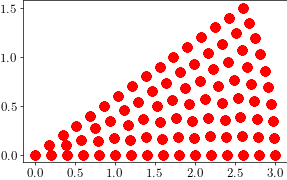

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(xsrt, ysrt, c='r', marker='o')

In [9]:
data_points = np.array(data_points)

In [10]:
interpolant = interp.RBFInterpolator(data_points,Pot)

In [15]:
xpoints = np.linspace(0,10,100)
data_eval = []
for i in range(100):
    data_eval.append([xpoints[i],0,2.5])
data_eval = np.array(data_eval)

In [16]:
print(interpolant([[0,5,2.5],[0,4,2.5]]))

[730.52194494 686.94321547]


In [17]:
def benzene():
    z_val = 0
    coord = []
    benzene = f"""
    C    -1.2073830   -0.6970829    {z_val} 
    C    -1.2073830    0.6970829    {z_val} 
    C     0.0000000    1.3941659    {z_val} 
    C     1.2073830    0.6970829    {z_val} 
    C     1.2073830   -0.6970829    {z_val} 
    C     0.0000000   -1.3941659    {z_val} 
    H    -2.1490090   -1.2407309    {z_val} 
    H    -2.1490090    1.2407309    {z_val} 
    H     0.0000000    2.4814619    {z_val} 
    H     2.1490090    1.2407309    {z_val} 
    H     2.1490090   -1.2407309    {z_val} 
    H     0.0000000   -2.4814619    {z_val}"""
    for line in benzene.split("\n"):
        if line:
            atom, x, y, z = line.split()
            if atom == 'C':
                coord.append([0,float(x),float(y),float(z)])
            elif atom == 'H':
                coord.append([1,float(x),float(y),float(z)])
    return coord
print(benzene())
LJ = np.array([[2.98, 18.36],[2.70, 12.13]])

[[0, -1.207383, -0.6970829, 0.0], [0, -1.207383, 0.6970829, 0.0], [0, 0.0, 1.3941659, 0.0], [0, 1.207383, 0.6970829, 0.0], [0, 1.207383, -0.6970829, 0.0], [0, 0.0, -1.3941659, 0.0], [1, -2.149009, -1.2407309, 0.0], [1, -2.149009, 1.2407309, 0.0], [1, 0.0, 2.4814619, 0.0], [1, 2.149009, 1.2407309, 0.0], [1, 2.149009, -1.2407309, 0.0], [1, 0.0, -2.4814619, 0.0]]


In [18]:
def LJval2(x,y,z,LJ):
    coord = benzene()
    val = 0
    for atom in coord:  
        r2 = (x-atom[1])**2 + (y-atom[2])**2 + (z - atom[3])**2
        eps = LJ[atom[0]][1]
        sig = LJ[atom[0]][0]
        val += 4*eps*(sig**12 / (r2)**6 - sig**6 / (r2**3))
    return val*0.695

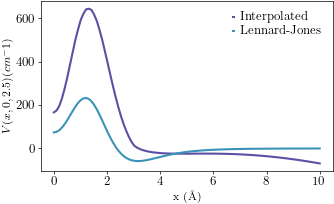

In [24]:
figsize = plt.rcParams['figure.figsize']
fig,ax = plt.subplots(figsize=(figsize[0],figsize[1]), constrained_layout=True)
ax.plot(xpoints,interpolant(data_eval),label='Interpolated')
ax.plot(np.linspace(0,10,100),LJval2(np.linspace(0,10,100),0,2.5,LJ),label='Lennard-Jones')
ax.set_xlabel('x (Å)')
ax.set_ylabel(r'$V(x,0,2.5) (cm^-1)$')
#plt.title('Cut along y = 0, z = 2.5')
plt.legend()
plt.savefig('Compare-radial2.pdf')

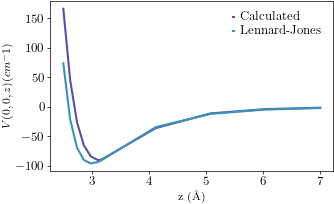

In [25]:
figsize = plt.rcParams['figure.figsize']
fig,ax = plt.subplots(figsize=(figsize[0],figsize[1]), constrained_layout=True)
ax.plot(zplt,Pot0,label='Calculated')
#p = np.concatenate([np.linspace(0.9, 3.0, 7, endpoint=False), np.linspace(3, 7, 3, endpoint=True)])
ax.plot(zplt,LJval2(0,0,zplt,LJ),label='Lennard-Jones')
ax.set_xlabel('z (Å)')
ax.set_ylabel(r'$V(0,0,z) (cm^-1)$')
#plt.title('Cut along x = 0, y = 0')
plt.legend()
plt.savefig('Compare-z.pdf')